In [84]:
import pandas as pd
from pathlib import Path
import glob, os
import os.path

# https://github.com/pemagrg1/text-classification

In [85]:
df = pd.read_pickle("./compilation_clean.pkl")
print(len(df)," elements")

6010  elements


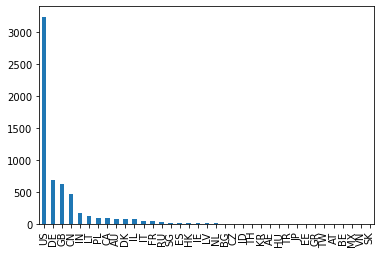

In [86]:
df.Country.value_counts().plot(kind='bar')

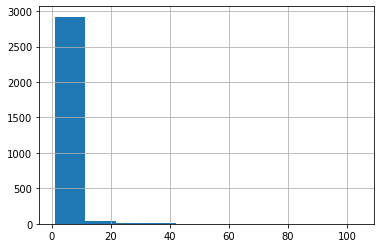

In [87]:
df.value.value_counts().hist()

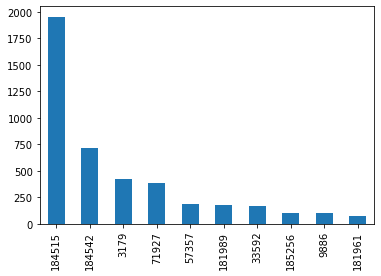

In [88]:
df.PrimaryCategoryID.value_counts()[:10].plot(kind='bar')

In [89]:
DFxl = df[["value","_currencyID","ViewItemURLForNaturalSearch","Title","PrimaryCategoryID","Country","Description"]].reset_index()
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk("/home/kelu/ultrasound/ebaystrove/images/") for f in filenames if os.path.splitext(f)[1] == '.jpg']
imagesID = [x.split(".")[-2].split("/")[-1] for x in images]
LIMIT = len('/home/kelu/ultrasound/ebaystrove/images/233384138652.jpg')
L = len("/home/kelu/ultrasound/ebaystrove/images/")
DFxl["group"] = "None"
for k in images:
    if len(k) > (LIMIT + 1):
        ID = k.split("/")[-1].split(".")[-2]
        DFxl["group"].loc[DFxl.ItemID == ID] = k.split("/")[-2]
DFxlNone = DFxl[(DFxl.group == "None")].reset_index().drop(['index'], axis=1)
DFxl = DFxl[~(DFxl.group == "None")].reset_index().drop(['index'], axis=1)

In [90]:
print(len(DFxl))
DFxl.head()

4907


,ItemID,value,_currencyID,ViewItemURLForNaturalSearch,Title,PrimaryCategoryID,Country,Description,group
0,132529667929,164.77,USD,https://www.ebay.com/itm/Philips-ATL-Dio-Stift...,Philips ATL Dio Stiftsonde CW Doppler Pencil P...,71927,DE,Philips ATL Dio Stiftsonde CW 3.2 MM ...,MechProbe
1,112314171710,326.79,USD,https://www.ebay.com/itm/Kretz-Endovaginal-5-0...,Kretz Endovaginal 5.0 MHz E.V 48 HD Ultrascha...,71927,DE,"Kretz Endovaginalsonde 5.0 MHz, Typ: E. V 48 H...",Array
2,372840599500,24.92,USD,https://www.ebay.com/itm/MOSKVICH-21412-1-6-80...,FOR MOSKVICH 21412 1.6 80HP -97 NEW GATES THER...,63711,GB,A to Z Motor Spares (Wakefield) Step1. C...,NotUS
3,324091756506,1745.82,USD,https://www.ebay.com/itm/GE-546L-Ultrasound-Pr...,GE 546L Ultrasound Probe / Transducer,184515,US,546L transducerCompatible SystemsGE 546L line...,Array
4,173300186560,19.25,USD,https://www.ebay.com/itm/Comline-Front-Right-S...,Comline Front Right Stabiliser Link Bar CSL604...,33592,GB,Comline Stabiliser Link BarIn order to check t...,NotUS


In [91]:
DFxl.to_excel("learning.xlsx", sheet_name='learning') 


In [92]:
import pickle 
with open('Pickles/DFNONE.pickle', 'wb') as output:
    pickle.dump(DFxlNone, output)

In [93]:
DFxlNone

,ItemID,value,_currencyID,ViewItemURLForNaturalSearch,Title,PrimaryCategoryID,Country,Description,group
0,383457623371,1250.0,USD,https://www.ebay.com/itm/PHILIPS-3D9-3V-ULTRAS...,PHILIPS 3D9-3V ULTRASOUND TRANSDUCER PROBE,184515,US,PHILIPS 3D9-3V ULTRASOUND TRANSDUCER PROBE. Co...,None
1,392584673255,399.0,USD,https://www.ebay.com/itm/MCube-CubeScan-Cube-S...,MCube CubeScan Cube Scan BioCon-700 Bladder Sc...,3179,US,MCube CubeScan Cube Scan BioCon-700 Bladder Sc...,None
2,383457629497,115.0,USD,https://www.ebay.com/itm/Acuson-8V5-Ultrasound...,Acuson 8V5 Ultrasound/Transducer Probe ~ with ...,181961,US,Acuson 8V5 Ultrasound/Transducer Probe ~ with ...,None
3,254459167401,1999.0,USD,https://www.ebay.com/itm/Olympus-Sonic-1200S-U...,Olympus Sonic 1200S Ultrasonic Flaw Detector -...,181989,US,Ultrasonic Flaw DetectorStock #191108NIncluded...,None
4,223943552530,802.0,USD,https://www.ebay.com/itm/Seimen-7CF2-Ultrasoun...,Seimen 7CF2 Ultrasound Transducer Probe,184515,US,"Cosmatically it is good .,meet and clean.but I...",None
...,...,...,...,...,...,...,...,...,...
1098,274218688389,350.0,USD,https://www.ebay.com/itm/Aloka-SSD-a5-Ultrasou...,Aloka SSD-a5 Ultrasound Probe Board EP451000DG...,184542,US,Home About Us Feedback View all listing...,None
1099,172578707455,75.0,USD,https://www.ebay.com/itm/Hitachi-SDEL-1-CU4096...,Hitachi SDEL-1 CU4096 Module For Hitachi EZU-M...,184542,US,"281 South Road, Route 107Kensington, N...",None
1100,283802108150,1079.1,USD,https://www.ebay.com/itm/Verathon-BladderScan-...,Verathon BladderScan 0570-0347 Ultrasound Prob...,184515,US,Verathon BladderScan Ultrasound Probe. 0570-03...,None
1101,274278073840,740.21,USD,https://www.ebay.com/itm/Aloka-Ultrasound-Boar...,Aloka Ultrasound Board EP525400CC,184542,IL,Aloka Ultrasound Board EP525400CCWe pride ours...,None
